<a href="https://colab.research.google.com/github/Meguazy/Walmart-Recruiting/blob/main/eda_cleaning_notebooks/Walmart_Recruiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Meguazy/Walmart-Recruiting.git

Cloning into 'Walmart-Recruiting'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 2.76 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
%cd Walmart-Recruiting/

/content/Walmart-Recruiting


In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import auth
auth.authenticate_user()

import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
EMAIL = str(gcloud_tokeninfo['email'])

!echo $EMAIL

#Usare per fare commit atomici e frequenti.
#Ricordiamoci di usare mettere sempre dei messaggi di commit chiari in modo da
#poter rollbackare o cherry-pickare in caso di bisogno.

!git config --global user.email $EMAIL

!git add .
!git commit -m ""
!git push

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from functools import reduce

In [5]:
train_df = pd.read_csv("data/train.csv.zip")
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
features_df = pd.read_csv("data/features.csv.zip")
features_df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
stores_df = pd.read_csv("data/stores.csv")
stores_df.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
df_merged = pd.merge(train_df, stores_df, on=['Store'],how='inner')

In [9]:
df_merged = pd.merge(df_merged, features_df, on=['Store', 'Date'], how='inner')
df_merged.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
5,1,6,2010-02-05,5749.03,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
6,1,7,2010-02-05,21084.08,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
7,1,8,2010-02-05,40129.01,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
8,1,9,2010-02-05,16930.99,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
9,1,10,2010-02-05,30721.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [10]:
df_sorted = df_merged.sort_values(by=['Date', 'Store', 'Dept'], ascending=True)
df_sorted['Weekly_Sales'] = df_sorted['Weekly_Sales'].astype(int)
df_sorted.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
5,1,6,2010-02-05,5749,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
6,1,7,2010-02-05,21084,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
7,1,8,2010-02-05,40129,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
8,1,9,2010-02-05,16930,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
9,1,10,2010-02-05,30721,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


## Checking if every triplet of Store, Dept and Date has exactly one row in the dataset
As we can see, the data is quite clean since there aren't any duplicated acquisition for the triplet of keys

In [11]:
check_duplicates = (df_sorted.groupby(['Store', 'Dept', 'Date']).size() > 1)
x = True
y = False
d = Counter(check_duplicates)
print('{} has occurred {} times'.format(x, d[x]))
print('{} has occurred {} times'.format(x, d[y]))
print('The total count of elements is {}'.format(len(check_duplicates)))

True has occurred 0 times
True has occurred 421570 times
The total count of elements is 421570


# Plotting the pie chart of average sales during and outside holidays
As we can see, the average sales during and outside holidays isn't so different. Meaning that, probably, the day being an holiday doesn't mean much when it comes to sales.
The correlation between the two features is also small.

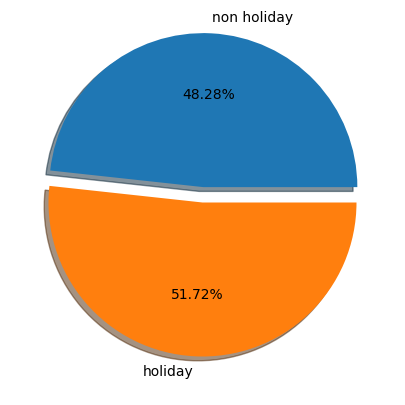

In [12]:
avg_holiday = df_sorted.groupby('IsHoliday_x')['Weekly_Sales'].mean()
avg_holiday_df = pd.DataFrame({'is_holiday':avg_holiday.index,'Average Sales':avg_holiday.values})

#getting the total sales by region

plt.figure(figsize=(8,5))
labels = ["non holiday", "holiday"]
plt.pie(data=avg_holiday_df, x='Average Sales',labels=labels,autopct='%1.2f%%',explode=[0.1,0],shadow=True)
plt.show()

In [14]:
df_sorted['Weekly_Sales'].corr(df_sorted['IsHoliday_x'])

0.012774234001656221

# Plotting the sales grouped by department
As we can see, the average sales during and outside holidays isn't so different. Meaning that, probably, the day being an holiday doesn't mean much when it comes to sales.

<ipython-input-13-645747492972>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(total_sales_sorted.index)


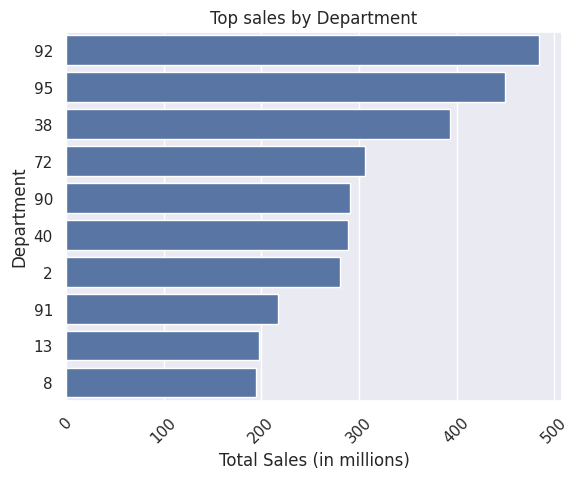

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
total_sales_sorted = (df_sorted.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending = False)/1000000).round(2)
#converting the adidas_sales_sorted from a series to a data frame and converting the variables intgo indexes
total_sales_reset = total_sales_sorted.reset_index(drop=True)
df = pd.DataFrame({'Dept': total_sales_reset.index, 'Total Sales': total_sales_reset.values})

# Set the Seaborn style
sns.set(style='darkgrid')

ax = sns.barplot(x='Total Sales',y='Dept', data=df.head(10),orient='h')
ax.set_yticklabels(total_sales_sorted.index)
# Set the labels and title
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Department')
plt.title('Top sales by Department')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()